# Efektiivsete interaktsioonikonstantide analüüs

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 'x-large'

import numpy as np

from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=true)

In [2]:
def Phi(mu11, mu22, mu12, etaTilde):
    return (1 + etaTilde * mu11 - etaTilde**2 * mu12**2 + etaTilde * mu22 +
            etaTilde**2 * mu11 * mu22)


def Theta11(mu11, mu22, mu12, nu11, etaTilde):
    return (-mu11 + etaTilde * mu12**2 - etaTilde * mu11 * mu22 - nu11 -
            etaTilde * mu11 * nu11 + etaTilde**2 * mu12**2 * nu11 -
            etaTilde * mu22 * nu11 - etaTilde**2 * mu11 * mu22 * nu11)


def Theta22(mu11, mu22, mu12, nu22, etaTilde):
    return (-mu22 + etaTilde * mu12**2 - etaTilde * mu11 * mu22 - nu22 -
            etaTilde * mu11 * nu22 + etaTilde**2 * mu12**2 * nu22 -
            etaTilde * mu22 * nu22 - etaTilde**2 * mu11 * mu22 * nu22)


def Theta12(mu11, mu22, mu12, nu12, etaTilde):
    return (-mu12 - nu12 - etaTilde * mu11 * nu12 +
            etaTilde**2 * mu12**2 * nu12 - etaTilde * mu22 * nu12 -
            etaTilde**2 * mu11 * mu22 * nu12)

In [3]:
def Gamma11(mu11, mu22, mu12, nu11, etaTilde):
    return Theta11(mu11, mu22, mu12, nu11, etaTilde) / Phi(
        mu11, mu22, mu12, etaTilde)


def Gamma22(mu11, mu22, mu12, nu22, etaTilde):
    return Theta22(mu11, mu22, mu12, nu22, etaTilde) / Phi(
        mu11, mu22, mu12, etaTilde)


def Gamma12(mu11, mu22, mu12, nu12, etaTilde, P):
    return Theta12(mu11, mu22, mu12, nu12,
                   etaTilde) / (P * Phi(mu11, mu22, mu12, etaTilde))


def Gamma21(mu11, mu22, mu12, nu12, etaTilde, P):
    return (P * Theta12(mu11, mu22, mu12, nu12, etaTilde)) / Phi(
        mu11, mu22, mu12, etaTilde)

In [4]:
etaTilde = np.log(10)
P = 2
mu11 = np.linspace(0, 1.0, 100)
mu22 = mu11
mu12 = np.linspace(0, 0.5, 50)
nu11 = np.linspace(-1.0, 0, 100)
nu22 = nu11
nu12 = np.linspace(-0.5, 0, 50)

In [5]:
mu11mu22 = np.meshgrid(mu11, mu22)
mu11nu11 = np.meshgrid(mu11, mu22)
mu22nu22 = np.meshgrid(mu11, mu22)
mu12nu12 = np.meshgrid(mu12, nu12)

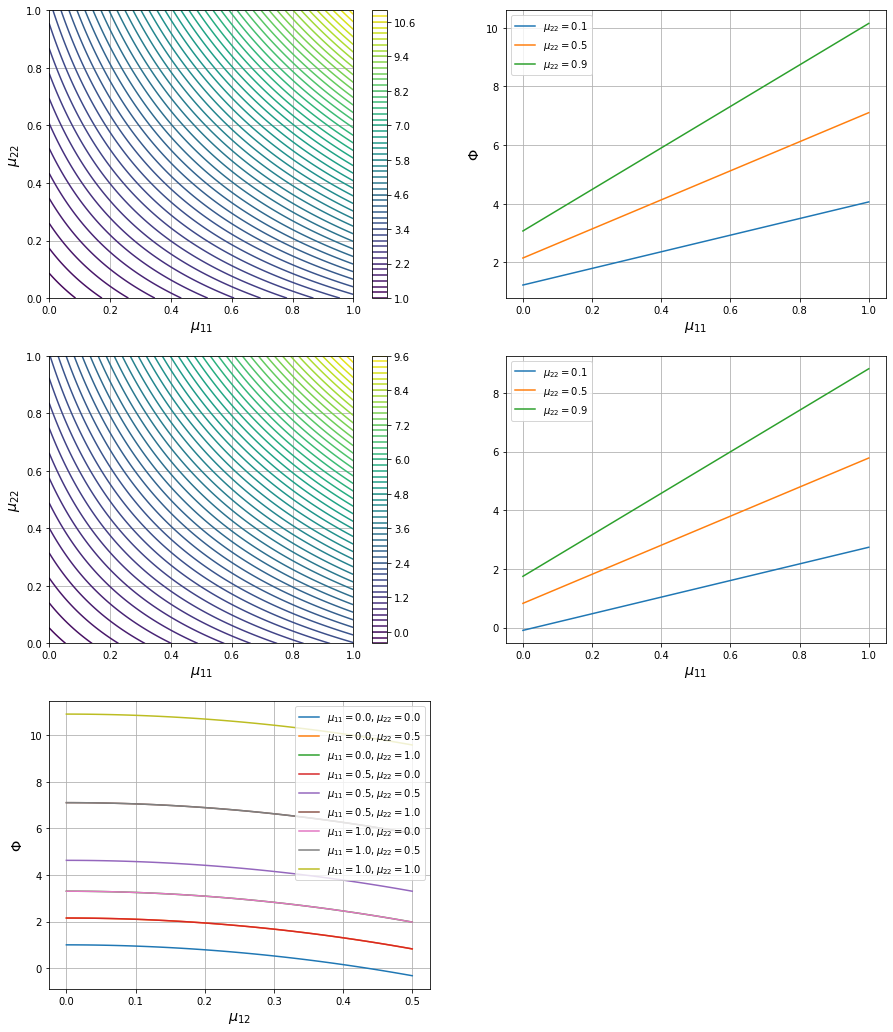

In [78]:
figrows = 3
figcols = 2

plt.figure(figsize=(15, 6 * figrows))

plt.subplot(figrows, figcols, 1)
plt.contour(mu11mu22[0], mu11mu22[1],
            Phi(mu11mu22[0], mu11mu22[1], 0.0, etaTilde), 50)
plt.colorbar()
plt.xlabel(r"$ \mu_{11} $")
plt.ylabel(r"$ \mu_{22} $")

plt.subplot(figrows, figcols, 2)
plt.plot(mu11, Phi(mu11, 0.1, 0.0, etaTilde), label=r"$ \mu_{22}=0.1 $")
plt.plot(mu11, Phi(mu11, 0.5, 0.0, etaTilde), label=r"$ \mu_{22}=0.5 $")
plt.plot(mu11, Phi(mu11, 0.9, 0.0, etaTilde), label=r"$ \mu_{22}=0.9 $")
plt.xlabel(r"$ \mu_{11} $")
plt.ylabel(r"$ \Phi $")
plt.legend()

plt.subplot(figrows, figcols, 3)
plt.contour(mu11mu22[0], mu11mu22[1],
            Phi(mu11mu22[0], mu11mu22[1], 0.5, etaTilde), 50)
plt.colorbar()
plt.xlabel(r"$ \mu_{11} $")
plt.ylabel(r"$ \mu_{22} $")

plt.subplot(figrows, figcols, 4)
plt.plot(mu11, Phi(mu11, 0.1, 0.5, etaTilde), label=r"$ \mu_{22}=0.1 $")
plt.plot(mu11, Phi(mu11, 0.5, 0.5, etaTilde), label=r"$ \mu_{22}=0.5 $")
plt.plot(mu11, Phi(mu11, 0.9, 0.5, etaTilde), label=r"$ \mu_{22}=0.9 $")
plt.xlabel(r"$ \mu_{11} $")
plt.legend()

plt.subplot(figrows, figcols, 5)
plt.plot(mu12, Phi(0.0, 0.0, mu12, etaTilde), label=r"$ \mu_{11}=0.0, \mu_{22}=0.0 $")
plt.plot(mu12, Phi(0.0, 0.5, mu12, etaTilde), label=r"$ \mu_{11}=0.0, \mu_{22}=0.5 $")
plt.plot(mu12, Phi(0.0, 1.0, mu12, etaTilde), label=r"$ \mu_{11}=0.0, \mu_{22}=1.0 $")
plt.plot(mu12, Phi(0.5, 0.0, mu12, etaTilde), label=r"$ \mu_{11}=0.5, \mu_{22}=0.0 $")
plt.plot(mu12, Phi(0.5, 0.5, mu12, etaTilde), label=r"$ \mu_{11}=0.5, \mu_{22}=0.5 $")
plt.plot(mu12, Phi(0.5, 1.0, mu12, etaTilde), label=r"$ \mu_{11}=0.5, \mu_{22}=1.0 $")
plt.plot(mu12, Phi(1.0, 0.0, mu12, etaTilde), label=r"$ \mu_{11}=1.0, \mu_{22}=0.0 $")
plt.plot(mu12, Phi(1.0, 0.5, mu12, etaTilde), label=r"$ \mu_{11}=1.0, \mu_{22}=0.5 $")
plt.plot(mu12, Phi(1.0, 1.0, mu12, etaTilde), label=r"$ \mu_{11}=1.0, \mu_{22}=1.0 $")
plt.xlabel(r"$ \mu_{12} $")
plt.ylabel(r"$ \Phi $")
plt.legend()

plt.show()

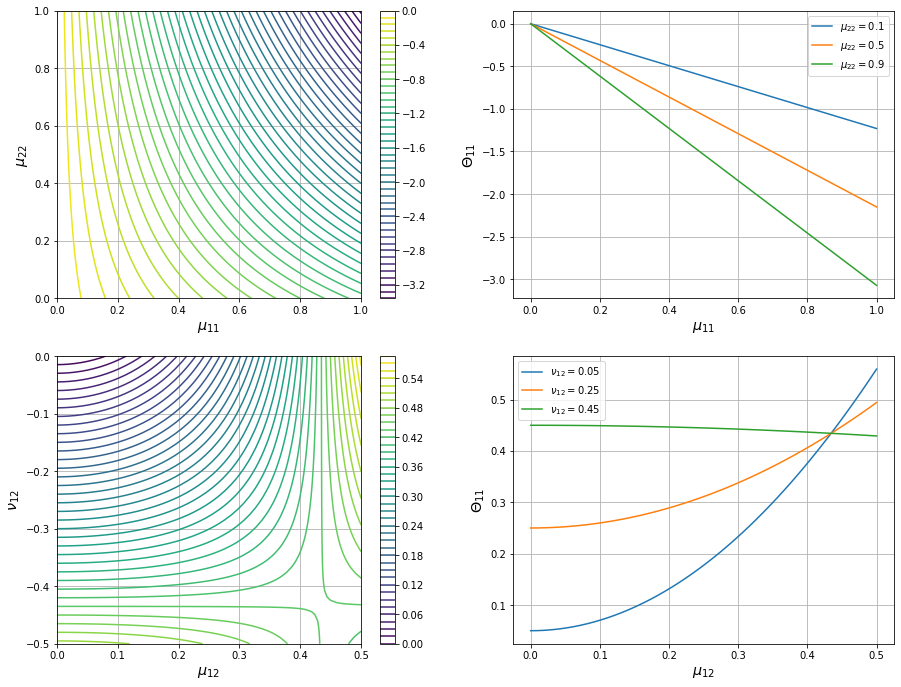

In [79]:
figrows = 3
figcols = 2

plt.figure(figsize=(15, 6 * figrows))

plt.subplot(figrows, figcols, 1)
plt.contour(mu11mu22[0], mu11mu22[1],
            Theta11(mu11mu22[0], mu11mu22[1], 0.0, 0.0, etaTilde), 50)
plt.colorbar()
plt.xlabel(r"$ \mu_{11} $")
plt.ylabel(r"$ \mu_{22} $")

plt.subplot(figrows, figcols, 2)
plt.plot(mu11, Theta11(mu11, 0.1, 0.0, 0.0, etaTilde), label=r"$ \mu_{22}=0.1 $")
plt.plot(mu11, Theta11(mu11, 0.5, 0.0, 0.0, etaTilde), label=r"$ \mu_{22}=0.5 $")
plt.plot(mu11, Theta11(mu11, 0.9, 0.0, 0.0, etaTilde), label=r"$ \mu_{22}=0.9 $")
plt.xlabel(r"$ \mu_{11} $")
plt.ylabel(r"$ \Theta_{11} $")
plt.legend()

plt.subplot(figrows, figcols, 3)
plt.contour(mu12nu12[0], mu12nu12[1],
            Theta11(0.0, 0.0, mu12nu12[0], mu12nu12[1], etaTilde), 50)
plt.colorbar()
plt.xlabel(r"$ \mu_{12} $")
plt.ylabel(r"$ \nu_{12} $")

plt.subplot(figrows, figcols, 4)
plt.plot(mu12, Theta11(0.0, 0.0, mu12, -0.05, etaTilde), label=r"$ \nu_{12}=0.05 $")
plt.plot(mu12, Theta11(0.0, 0.0, mu12, -0.25, etaTilde), label=r"$ \nu_{12}=0.25 $")
plt.plot(mu12, Theta11(0.0, 0.0, mu12, -0.45, etaTilde), label=r"$ \nu_{12}=0.45 $")
plt.xlabel(r"$ \mu_{12} $")
plt.ylabel(r"$ \Theta_{11} $")
plt.legend()

plt.show()